In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
trans = pd.read_csv(r"C:\Users\Kaniska Jain\Documents\DATA SCIENCE\PYTHON\case studies\Case Study 1 - Retail Case Study\Transactions.csv")
prod_cat_info = pd.read_csv(r"C:\Users\Kaniska Jain\Documents\DATA SCIENCE\PYTHON\case studies\Case Study 1 - Retail Case Study\prod_cat_info.csv")
customer = pd.read_csv(r"C:\Users\Kaniska Jain\Documents\DATA SCIENCE\PYTHON\case studies\Case Study 1 - Retail Case Study\Customer.csv")

In [3]:
print(trans.shape)
trans.head()

(23053, 10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:

print(prod_cat_info.shape)
prod_cat_info.head()

(23, 4)


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
print(customer.shape)
customer.head()

(5647, 4)


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly

In [6]:
Customer_Final = pd.merge(left=pd.merge(left=trans,right=customer,left_on='cust_id', 
                                right_on='customer_Id'), right=prod_cat_info,
                     left_on='prod_cat_code', right_on='prod_cat_code')

### 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [7]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     99293 non-null  int64  
 1   cust_id            99293 non-null  int64  
 2   tran_date          99293 non-null  object 
 3   prod_subcat_code   99293 non-null  int64  
 4   prod_cat_code      99293 non-null  int64  
 5   Qty                99293 non-null  int64  
 6   Rate               99293 non-null  int64  
 7   Tax                99293 non-null  float64
 8   total_amt          99293 non-null  float64
 9   Store_type         99293 non-null  object 
 10  customer_Id        99293 non-null  int64  
 11  DOB                99293 non-null  object 
 12  Gender             99253 non-null  object 
 13  city_code          99257 non-null  float64
 14  prod_cat           99293 non-null  object 
 15  prod_sub_cat_code  99293 non-null  int64  
 16  prod_subcat        992

In [8]:
Customer_Final.tran_date = Customer_Final.tran_date.str.replace('/','-')
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)

C:\Users\Kaniska Jain\AppData\Local\Temp\ipykernel_8172\643465455.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Kaniska Jain\AppData\Local\Temp\ipykernel_8172\643465455.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)


In [9]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     99293 non-null  int64         
 1   cust_id            99293 non-null  int64         
 2   tran_date          99293 non-null  datetime64[ns]
 3   prod_subcat_code   99293 non-null  int64         
 4   prod_cat_code      99293 non-null  int64         
 5   Qty                99293 non-null  int64         
 6   Rate               99293 non-null  int64         
 7   Tax                99293 non-null  float64       
 8   total_amt          99293 non-null  float64       
 9   Store_type         99293 non-null  object        
 10  customer_Id        99293 non-null  int64         
 11  DOB                99293 non-null  datetime64[ns]
 12  Gender             99253 non-null  object        
 13  city_code          99257 non-null  float64       
 14  prod_c

### b. Top/Bottom 10 observations

In [10]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,3,Kids
3,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens
4,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
5,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,3,Kids
6,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,4,Mens
7,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women
8,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,3,Kids
9,63126920365,271489,2011-05-22,4,1,4,131,55.020,579.020,TeleShop,271489,1971-04-21,M,9.0,Clothing,4,Mens


In [11]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
99283,34958490122,266849,2011-02-20,12,6,4,1155,485.10,5105.10,e-Shop,266849,1979-10-12,M,1.0,Home and kitchen,11,Bath
99284,34958490122,266849,2011-02-20,12,6,4,1155,485.10,5105.10,e-Shop,266849,1979-10-12,M,1.0,Home and kitchen,12,Tools
99285,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,2,Furnishing
99286,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,10,Kitchen
99287,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,11,Bath
99288,65823235153,272650,2011-02-16,11,6,2,358,75.18,791.18,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,12,Tools
99289,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,2,Furnishing
99290,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,10,Kitchen
99291,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,11,Bath
99292,20417144530,269556,2011-01-29,10,6,3,654,206.01,2168.01,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,12,Tools


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [12]:
Customer_Final.select_dtypes('number').describe().T.iloc[:,3:]

,min,25%,50%,75%,max
transaction_id,3268991.000,2.492150e+10,5.011083e+10,7.528121e+10,9.998755e+10
cust_id,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
prod_subcat_code,1.000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.130000e+02,7.130000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.999200e+02,3.669750e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.761370e+03,3.585725e+03,8.287500e+03
customer_Id,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


### d. Frequency tables for all the categorical variables

In [13]:
Customer_Final.select_dtypes('object').value_counts()

Store_type      Gender  prod_cat  prod_subcat
e-Shop          M       Books     Non-Fiction    1259
                                  Fiction        1259
                                  DIY            1259
                                  Comics         1259
                                  Children       1259
                                                 ... 
Flagship store  F       Bags      Mens            200
MBR             F       Bags      Women           198
                                  Mens            198
Flagship store  M       Bags      Women           189
                                  Mens            189
Name: count, Length: 184, dtype: int64

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.


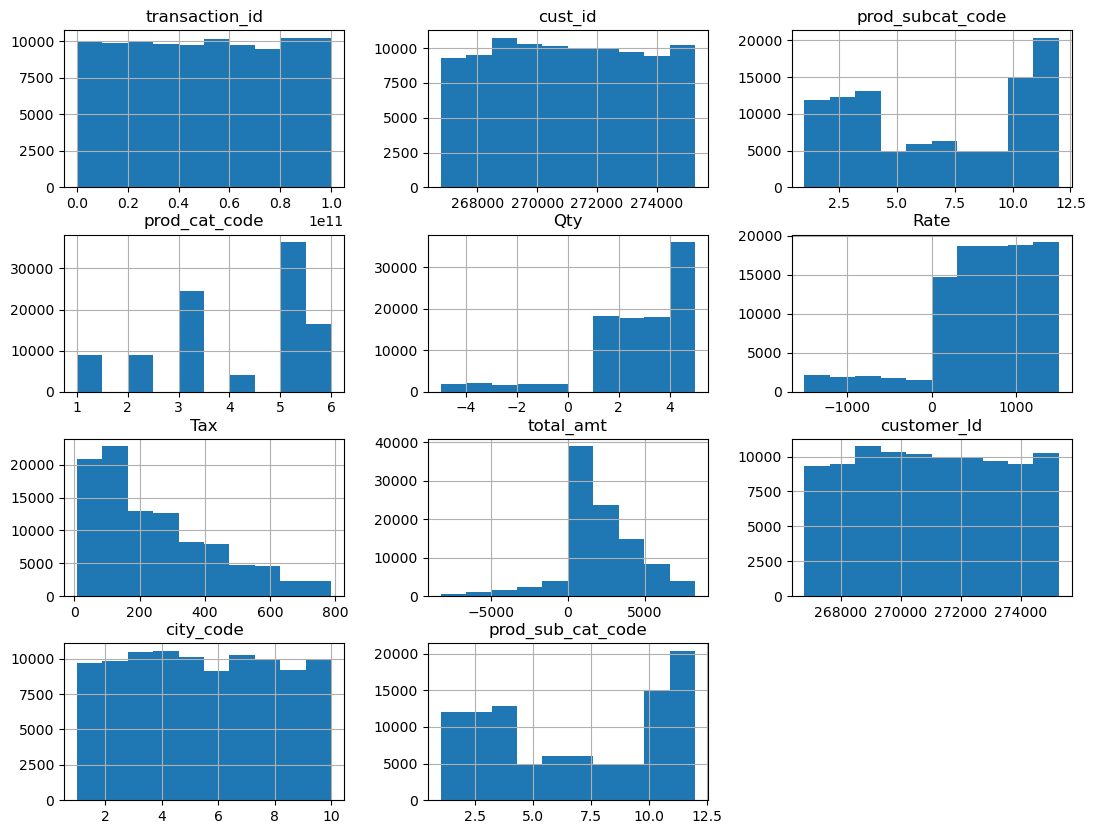

In [14]:
Customer_Final.select_dtypes('number').hist(figsize=(13,10))
plt.show()

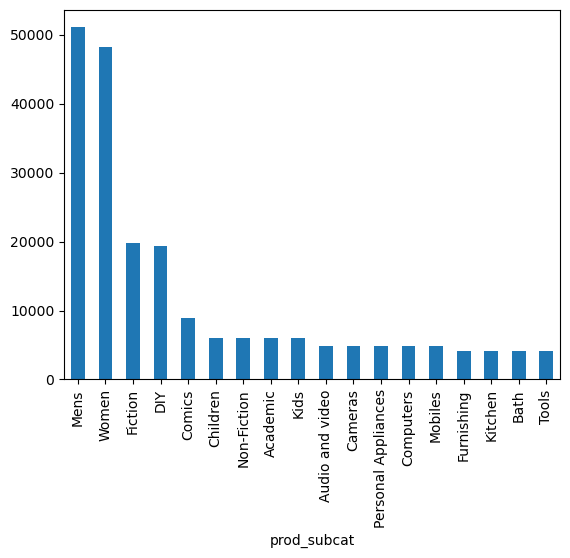

In [15]:
for col in Customer_Final.select_dtypes('object').columns:
    Customer_Final[col].value_counts().plot(kind = 'bar')

### 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [16]:
print('The dataset begins from:',Customer_Final.tran_date.min(),'and ends with',
Customer_Final.tran_date.max())
print('which is',Customer_Final.tran_date.max()-Customer_Final.tran_date.min())

The dataset begins from: 2011-01-25 00:00:00 and ends with 2014-02-28 00:00:00
which is 1130 days 00:00:00


### b. Count of transactions where the total amount of transaction was negative


In [17]:
Customer_Final.transaction_id[Customer_Final.total_amt < 0].count()

9294

### 5. Analyze which product categories are more popular among females vs male customers.

In [18]:
print("Male Preferences",'\n',pd.DataFrame(Customer_Final.prod_cat[Customer_Final.Gender == 'M']\
                                           .value_counts()).rename(columns={'prod_cat':'Count'}))
print('----------------------------')
print('Female Preferences','\n',pd.DataFrame(Customer_Final.prod_cat[Customer_Final.Gender == 'F']\
                                             .value_counts()).rename(columns={'prod_cat':'Count'}))
print('----------------------------')
print('the diff are','\n',pd.DataFrame(Customer_Final.prod_cat[Customer_Final.Gender == 'M']\
                                       .value_counts()).rename(columns={'prod_cat':'Count'})\
      - pd.DataFrame(Customer_Final.prod_cat[Customer_Final.Gender == 'F']\
                     .value_counts()).rename(columns={'prod_cat':'Count'}))
print('positive shows more men bought a product than women, negative shows the inverse')

Male Preferences 
                   count
prod_cat               
Books             18696
Electronics       12850
Home and kitchen   8536
Clothing           4554
Footwear           4407
Bags               2008
----------------------------
Female Preferences 
                   count
prod_cat               
Books             17694
Electronics       11640
Home and kitchen   7976
Footwear           4587
Clothing           4317
Bags               1988
----------------------------
the diff are 
                   count
prod_cat               
Bags                 20
Books              1002
Clothing            237
Electronics        1210
Footwear           -180
Home and kitchen    560
positive shows more men baught a product than women, negative shows the inverse


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [19]:
max_Count = pd.DataFrame(Customer_Final.customer_Id.groupby(Customer_Final.city_code).count()\
             .sort_values(ascending=False)).rename(columns={'customer_Id':'Count'})
max_Count

#the highest customers come from city code 4.0

,Count
city_code,
4.0,10571
3.0,10467
7.0,10258
5.0,10116
10.0,9976
8.0,9965
2.0,9843
1.0,9717
9.0,9214


In [20]:
pd.DataFrame(max_Count.iloc[0]*100/max_Count.sum()).rename(index={'Count':'City Code 4.0'},
                                                          columns={0:'Percentage of total pop'})
#print('the percentage of people from city code 4.0 out of total population are', per,'%')

,Percentage of total pop
City Code 4.0,10.65013


### 7. Which store type sells the maximum products by value and by quantity?


In [21]:
Customer_Final[['Qty','total_amt']].groupby(Customer_Final.Store_type).sum()\
            .sort_values(by=['Qty','total_amt'], ascending=False)
#the e-Shop store type sells the most in both categories

,Qty,total_amt
Store_type,,
e-Shop,98447,8.591575e+07
MBR,48285,4.170033e+07
Flagship store,48007,4.188397e+07
TeleShop,47339,4.046656e+07


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [22]:
Customer_Final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,4,Mens


In [23]:
flagshipdf = Customer_Final[Customer_Final.Store_type == 'Flagship store']
tot_amt = pd.DataFrame(flagshipdf.total_amt.groupby(flagshipdf.prod_cat).sum())
tot_amt.loc[['Clothing','Electronics']]

,total_amt
prod_cat,
Clothing,3583269.69
Electronics,11075680.20


### 9. What was the total amount earned from "Male" customers under the "Electronics" category

In [24]:
male_df = Customer_Final[Customer_Final.Gender == 'M']
pd.DataFrame(male_df.total_amt.groupby(male_df['prod_cat']).sum()).loc['Electronics']

total_amt    2.851555e+07
Name: Electronics, dtype: float64

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [25]:
pos_trans = Customer_Final[Customer_Final.total_amt > 0]
cust_df = pd.DataFrame(pos_trans.transaction_id.groupby(pos_trans.cust_id).count()\
                       .sort_values(ascending=False)).rename(columns={'transaction_id':'count of trans'})
cust_df[cust_df['count of trans'] > 10].shape[0]
print('The number of customers haing more than 10 transactions are',
      cust_df[cust_df['count of trans'] > 10].shape[0])

The number of customers haing more than 10 transactions are 4019


### 11. For all customers aged between 25 - 35, find out:

###  a. What was the total amount spent for “Electronics” and “Books” product categories?

In [26]:
Customer_Final['age'] = ((dt.datetime.now() - Customer_Final.DOB)/365).dt.days
young_df = Customer_Final[(Customer_Final.age >= 25) & (Customer_Final.age <= 35)]
req_df = pd.DataFrame(young_df.total_amt.groupby(young_df.prod_cat).sum()).loc[['Electronics','Books']]
req_df.rename(columns={'total_amt':'25-35 age group spent'},inplace=True)
req_df

,25-35 age group spent
prod_cat,
Electronics,11231695.15
Books,15867114.90


###  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [27]:
Customer_Final[(Customer_Final.tran_date > '1st Jan, 2014') & (Customer_Final.tran_date < '1st Mar, 2014')]\
.total_amt.sum()

9343573.915